# Here is the solution of first task

Meanings of every columns:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

Loading data and having a look at them

In [1]:
# importing every needed library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/sample_sales_data.csv')

print(df.shape)
df.head()

(7829, 10)


,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## Descriprive statistics


In [4]:
quantitive_columns = df.describe().columns 
categorical = df.describe(include=[object]).columns # I'll use these lists to visualize data further

In [5]:
# but let's visualise whole descriptive statistics
df.describe(include = 'all')

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
count,7829,7829,7829,7829,7829,7829.000000,7829.000000,7829.000000,7829
unique,7829,7738,300,22,5,NaN,NaN,NaN,4
top,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 19:32:20,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,NaN,NaN,NaN,cash
freq,1,2,114,998,1601,NaN,NaN,NaN,2027
mean,NaN,NaN,NaN,NaN,NaN,7.819480,2.501597,19.709905,NaN
std,NaN,NaN,NaN,NaN,NaN,5.388088,1.122722,17.446680,NaN
min,NaN,NaN,NaN,NaN,NaN,0.190000,1.000000,0.190000,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.990000,1.000000,6.570000,NaN
50%,NaN,NaN,NaN,NaN,NaN,7.190000,3.000000,14.970000,NaN
75%,NaN,NaN,NaN,NaN,NaN,11.190000,4.000000,28.470000,NaN


In [6]:
# Here I'm going to explore numerical data: computing distributions
def normal_distribution(data: pd.DataFrame = None):
    for col in quantitive_columns:
        if df[col].max() > (df[col].mean() * (3 * df[col].std())) or df[col].min() < (df[col].mean() * (-3 * df[col].std())):
            print(f'{col} has values greater mean*3std ')

        else: print(f'{col} has no values greater mean*3std')
            
            
normal_distribution(df)


unit_price has no values greater mean*3std
quantity has no values greater mean*3std
total has no values greater mean*3std


We can see, that every quantitive column is normally distributed

## Visualization

In [7]:
def categorical_distrubtion(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect = 2) :
    sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def numerical_distribution(data: pd.DataFrame = None, column: str = None, axes: int = None):
    sns.displot(data = data, x = column, 
               ax = [i, 0]).set(title = f"Distribution of {column}")
    plt.show()
    
def count_unique_vars(data: pd.DataFrame = None, column: str = None):
    print(f'Column {column} has {len(data[column].unique())} unique value')
    print(data[column].value_counts())
    
def corr_plot(data: pd.DataFrame = None):
    sns.heatmap(data = data.corr(), 
               annot = True,
               fmt = '.1f')

Current task is rewrite functions with matplotlib and optimise it to my tasks

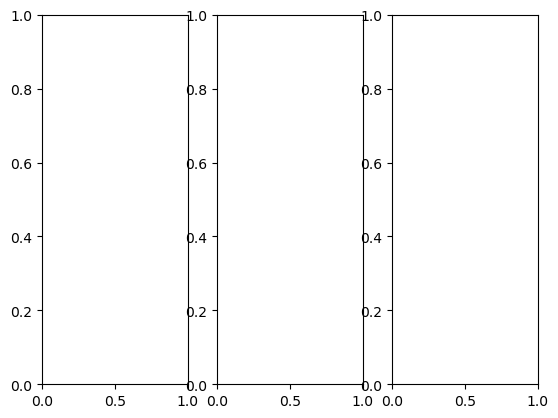

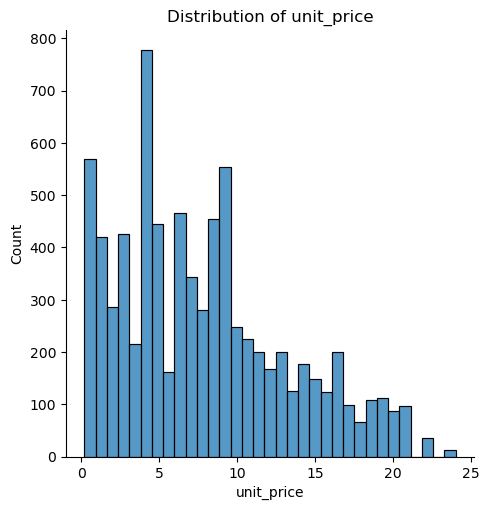

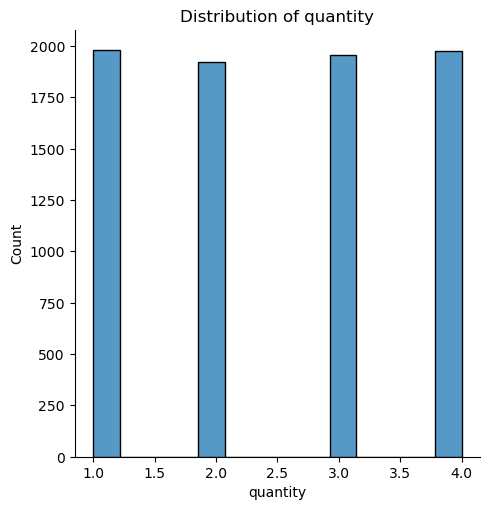

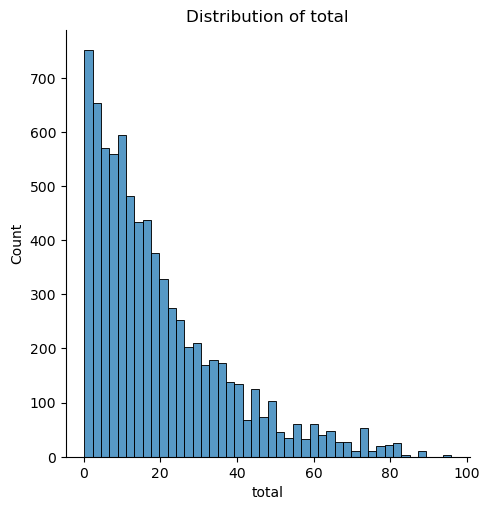

In [8]:
# So let's visualise all variables
fig, axes = plt.subplots(nrows = 1, ncols = len(quantitive_columns))
for i in range(len(quantitive_columns)):
    numerical_distribution(data = df, column = quantitive_columns[i], axes = i)

Conclusions:
- unit_price: we can see, that it isn't normally distributed. It's little bit skewed to the right. It tells us, that lots of units are sold for low price 
- quantity: here we see, that it has only for unique values, which are almost equally distributed. It tells us, that all products are sold for equal quantity
- total: it's also skewed to the right, it means, that there may be correlation between unit_price and total, because their plots are similar, and total obviously depends on unit_price

Column category has 22 unique value
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64
None


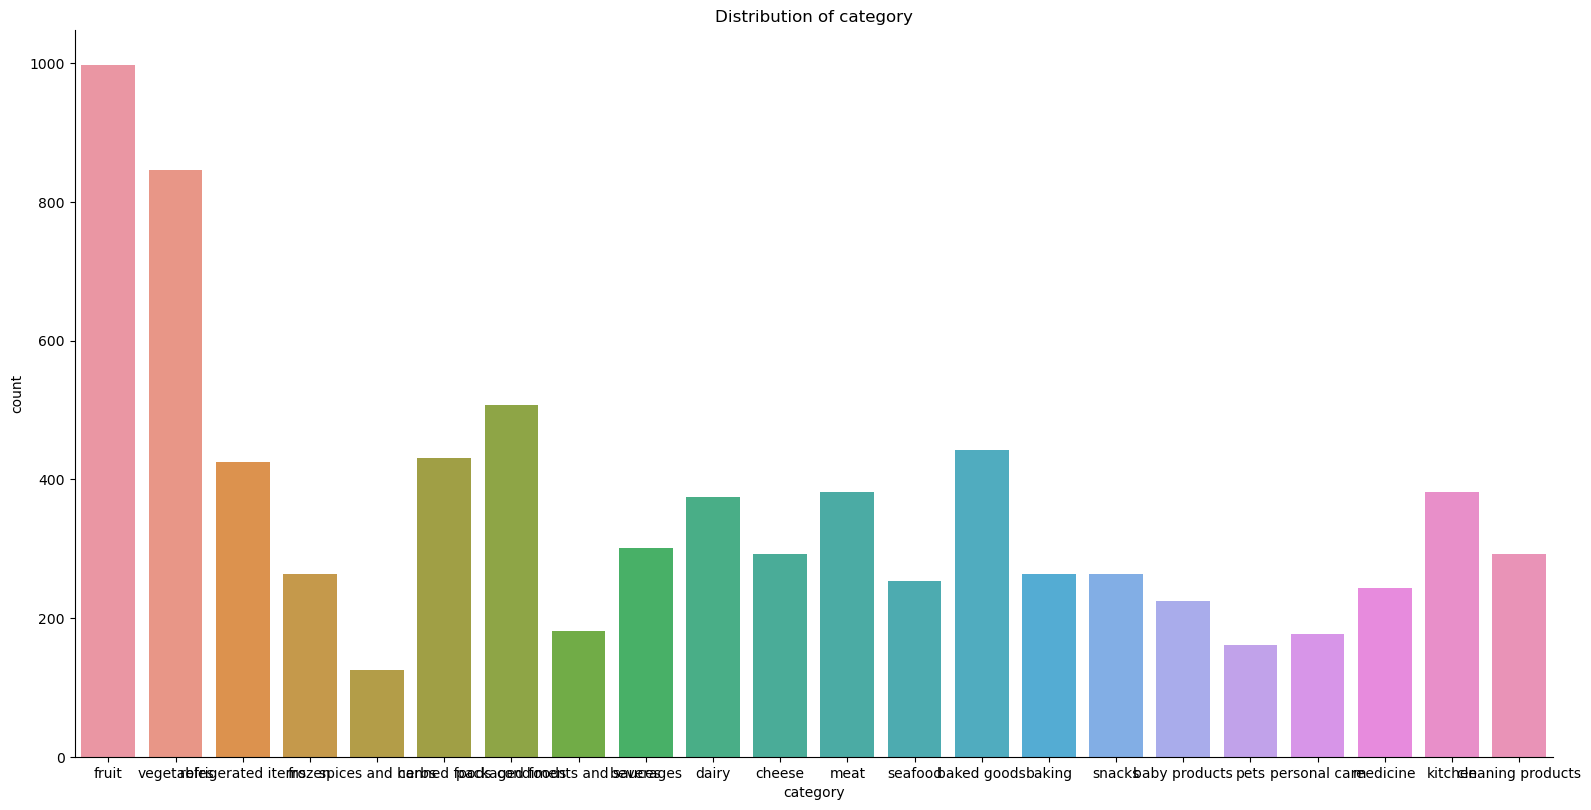

In [9]:
# now let's visualize categorical data
print(count_unique_vars(df, 'category'))
categorical_distrubtion(data = df, column = 'category')

Column customer_type has 5 unique value
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64
None


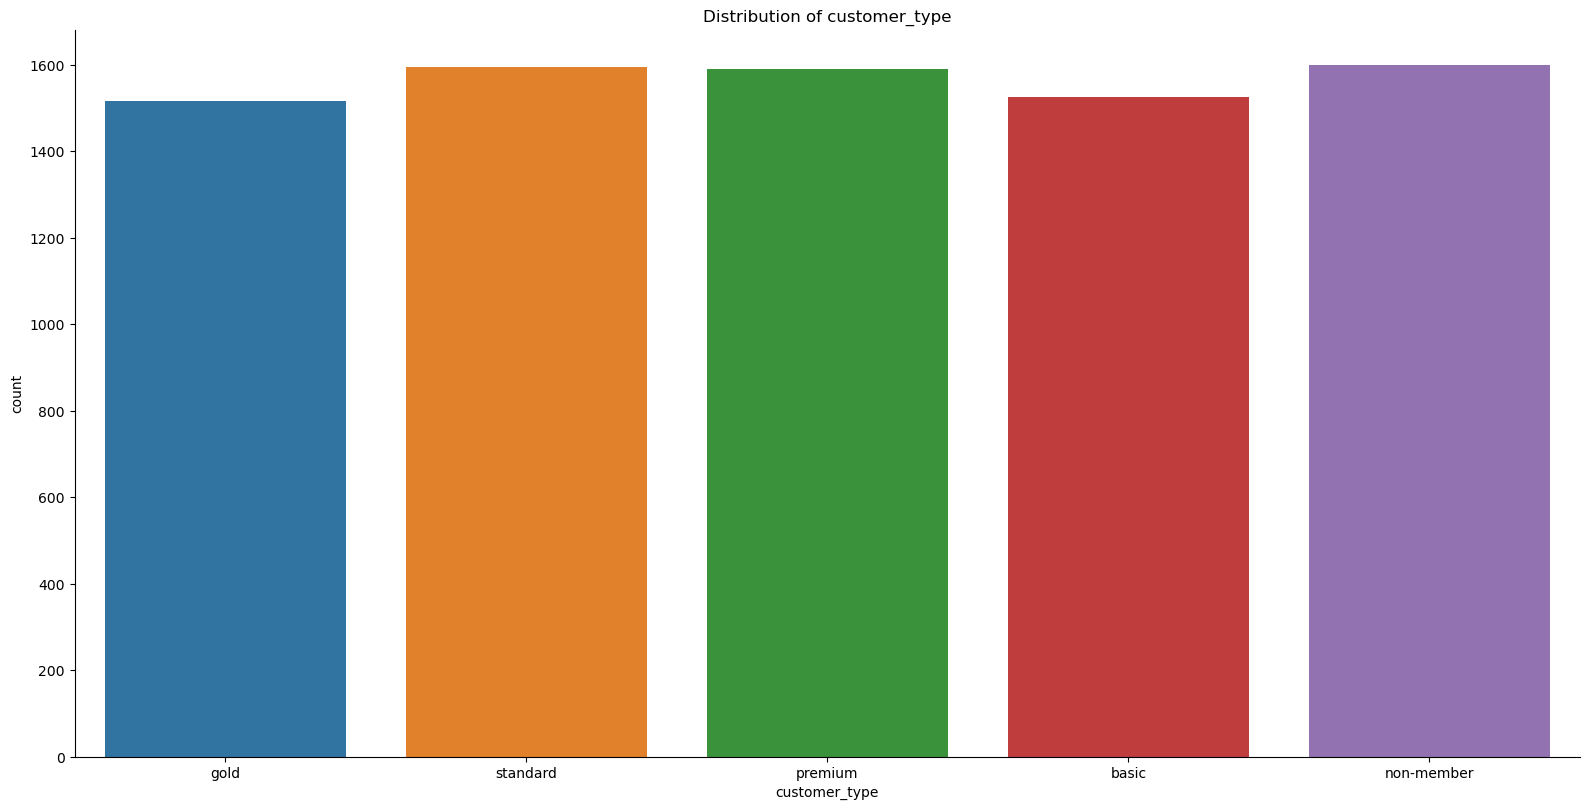

In [10]:
print(count_unique_vars(df, 'customer_type'))
categorical_distrubtion(df, 'customer_type')

Here we can see, most of customers are non-members.

Column payment_type has 4 unique value
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64
None


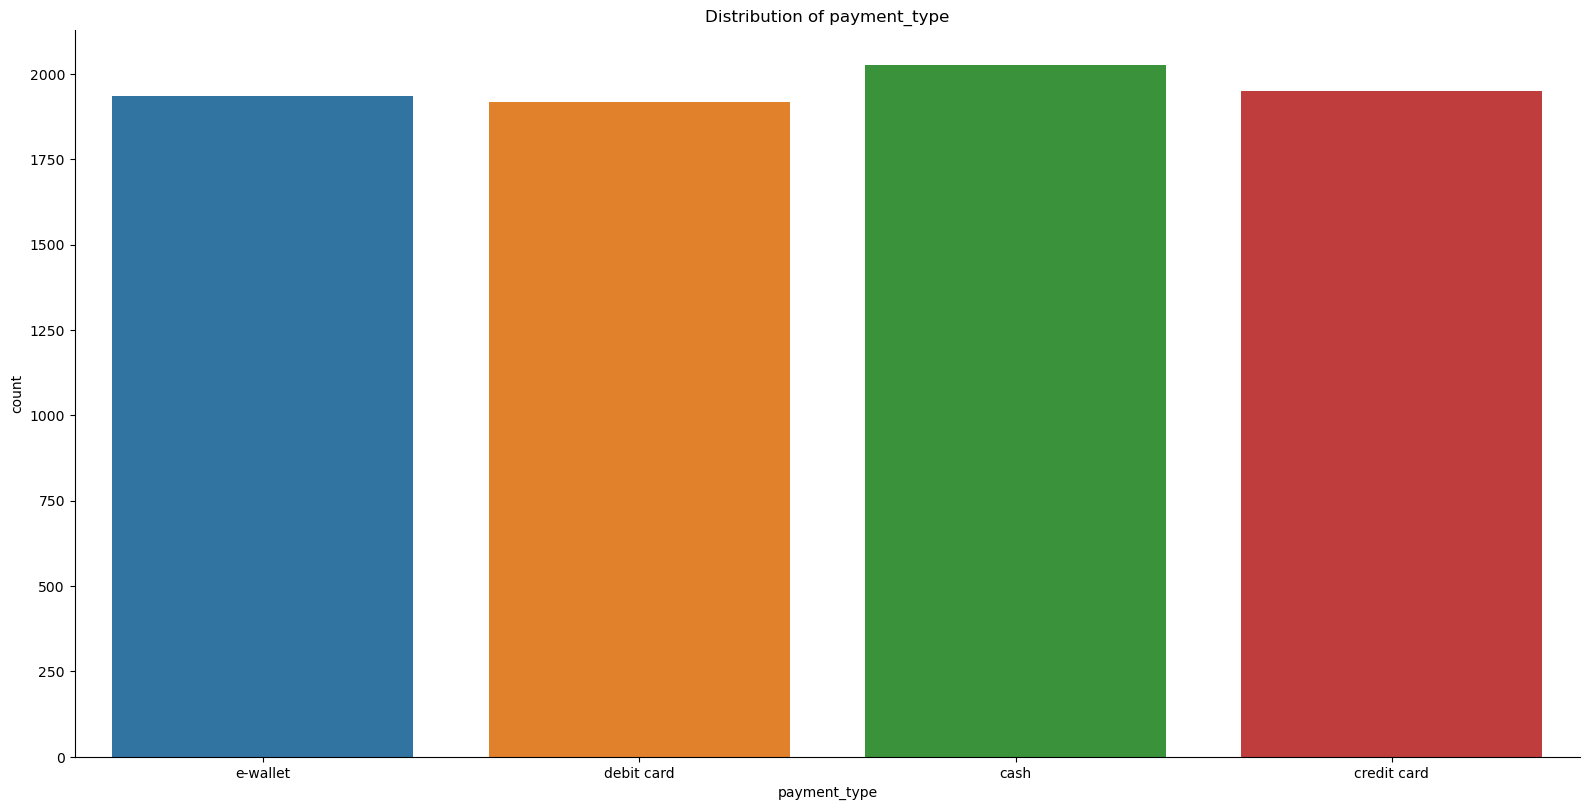

In [11]:
print(count_unique_vars(df, 'payment_type'))
categorical_distrubtion(df, 'payment_type')

Here we can see, that cash is the most frequent type of payment, nevertheless other types are close to cash.

In [12]:
print(count_unique_vars(df, 'transaction_id'))
print(count_unique_vars(df, 'product_id'))


Column transaction_id has 7829 unique value
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64
None
Column product_id has 300 unique value
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc

Here we can conclude, that product_id and transaction_id has lots of unique values, because each transaction_id must be unique , and product too

In [14]:
# here we have good column, which can help us to find out when people purchase more.
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
df.timestamp

0      2022-03-02 09:51:38
1      2022-03-06 10:33:59
2      2022-03-04 17:20:21
3      2022-03-02 17:23:58
4      2022-03-05 14:32:43
               ...        
7824   2022-03-03 18:22:09
7825   2022-03-04 19:14:46
7826   2022-03-03 14:00:09
7827   2022-03-04 15:11:38
7828   2022-03-06 13:50:36
Name: timestamp, Length: 7829, dtype: datetime64[ns]

In [15]:
df['hour'] = df['timestamp'].dt.hour
count_unique_vars(df, 'hour')

Column hour has 11 unique value
11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


People prefer to visit our site in 11, 16, 18, so they are the 3 most frequent hours. Because this is population sample we cannot make assumptions, but it's interesting, that people prefer to visit our site after lunch or when they are coming home.

### Correlations

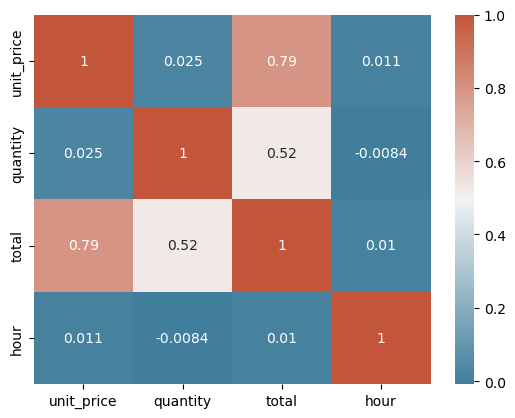

In [16]:
corr = df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), annot=True);

 As I said before, unit_price and total has strong correlation coefficent. Also we can emphasize correlation between quantity and total, it's less, than unit_price because total depends on the product is sold, and btw quantity is equally distributed, so it may also have an influence on total.   

# Conclusions
What client wants? 

- "How to sell better? " 

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

  -  We need more rows of data. The current sample is only from 1 store and 1 week worth of data
   - We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
   - We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving fo